# Homework 1 - Data Preparation Phase

Dataset: Student Performance

Description: 
This data approach student achievement in secondary education of two Portuguese schools. 
The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. 
Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], 
the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation 
with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. 
It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

In this model, I will be focusing solely on the mathematical portion of this dataset

https://archive.ics.uci.edu/datasets
Search -> Social Sciences -> Download
https://archive.ics.uci.edu/dataset/320/student+performance

In [2]:
import pandas as pd   # Import the pandas module

In [3]:
# Read the csv file
Student = pd.read_csv('student-mat.csv',sep=';') 

In [4]:
Student.shape # Check the shape of the object

(395, 33)

In [5]:
print(Student.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [7]:
print(Student.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Adding an Index Column and displaying its shape

In [8]:
# Creating a new column called 'Index' in the bank_train dataframe
Student['index'] = pd.Series(range(0,394))

In [9]:
Student.shape # Check the shape of the object

(395, 34)

In [10]:
print(Student.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 index  
0        3     4     1     1       3        6   5   6   6   0.0  
1        3     3     1     1       3        4   5   5   6   1.0  
2        3     2     2     3       3       10   7   8  10   2.0  
3        2     2     1     1       5        2  15  14  15   3.0  
4        3     2     1     2       5        4   6  10  10   4.0  

[5 rows x 34 columns]


In [11]:
#  Printing unique values of absences
print(Student['absences'].unique())

[ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]


In [12]:
# Replace all absences = 75 for zero
Student['absences'] = Student['absences'].replace({75: 0})

<Axes: title={'center': 'Histogram of absences'}, ylabel='Frequency'>

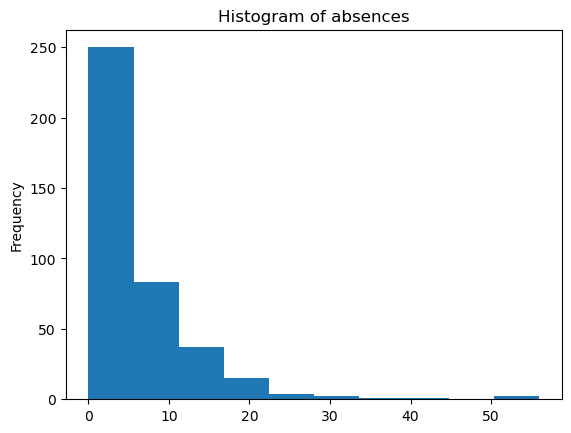

In [13]:
Student['absences'].plot(kind = 'hist', title = 'Histogram of absences')

## Reexpression of categorical data as numeric

In [14]:
# Replicate the activities variable 
Student["activities_numeric"] = Student['activities']

In [18]:
print(Student.tail())

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... goout Dalc  Walc  health  absences  G1  G2  G3  index  \
390  ...     4    4     5       4        11   9   9   9  390.0   
391  ...     5    3     4       2         3  14  16  16  391.0   
392  ...     3    3     3       3         3  10   8   7  392.0   
393  ...     1    3     4       5         0  11  12  10  393.0   
394  ...     3    3     3       5         5   8   9   9    NaN   

    activities_numeric  
390                 no  
391                 no  
392                 no  
393                 no  
394

In [16]:
# Inspect the unique values for activities
print(Student['activities'].unique())

['no' 'yes']


In [17]:
# Create a dictionary with the numeric values equivalences
dict_act = {"activities_numeric": {"no":0, "yes":1}}
dict_act

{'activities_numeric': {'no': 0, 'yes': 1}}

In [19]:
# Make the replacement
Student.replace(dict_act, inplace=True)

## Standardizing the numeric fields

In [20]:
from scipy import stats # Import the scipy module

In [21]:
# Number of standard deviations above the mean
Student["age_z"] = stats.zscore(Student['age'])

<Axes: title={'center': 'Histogram of age normalized'}, ylabel='Frequency'>

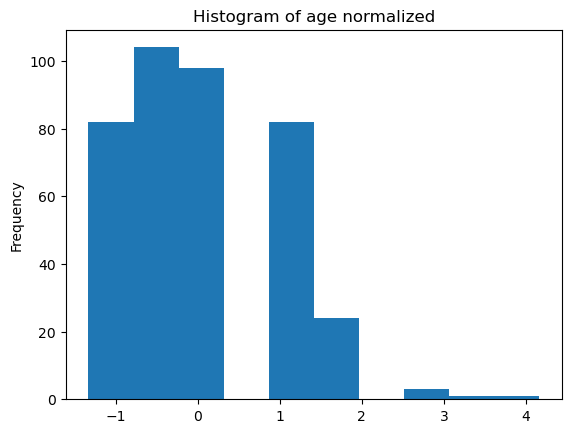

In [22]:
Student['age_z'].plot(kind = 'hist', title = 'Histogram of age normalized')

## Identifying outliers

### A data value is an outlier if its z‐value is either greater than 3, or less than −3

In [23]:
Student.query('age_z > 3 | age_z < -3') # Listing the outliers

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,index,activities_numeric,age_z
247,GP,M,22,U,GT3,T,3,1,services,services,...,5,5,1,16,6,8,8,247.0,0,4.161713
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,10,8,7,392.0,0,3.377047


In [25]:
# Create a new data set with outliers and print
Student_outliers = Student.query('age_z > 3 | age_z < -3')

In [26]:
print(Student_outliers.head())

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
247     GP   M   22       U     GT3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   

     ... Dalc Walc  health  absences  G1 G2 G3  index activities_numeric  \
247  ...    5    5       1        16   6  8  8  247.0                  0   
392  ...    3    3       3         3  10  8  7  392.0                  0   

        age_z  
247  4.161713  
392  3.377047  

[2 rows x 36 columns]


In [27]:
# Sorting the data
Student_sort = Student.sort_values(['age_z'], ascending = False)

In [28]:
print(Student_sort[['age','sex','absences']].head(n=15))   # To see only two specific columns

     age sex  absences
247   22   M        16
392   21   M         3
390   20   M        11
306   20   M         0
376   20   F         4
394   19   M         5
310   19   F         0
340   19   F         4
336   19   F        12
315   19   F        40
314   19   F        14
313   19   F        22
127   19   F         2
311   19   F        20
307   19   M        38
